In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

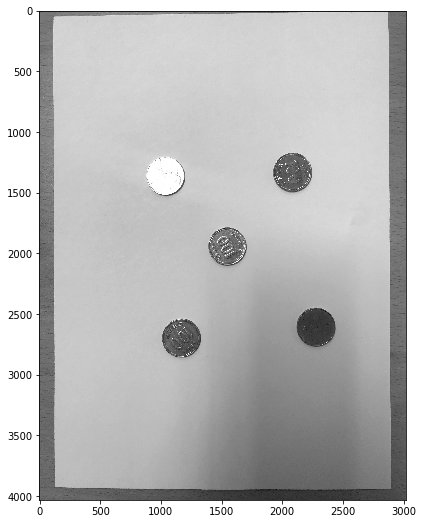

In [104]:
image = '/home/khan/cv/Image0/coins_set1.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

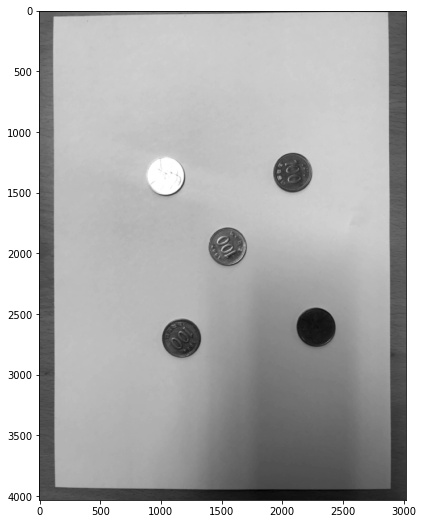

In [105]:
img =  cv2.GaussianBlur(img, (21,21), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

In [106]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 50, maxRadius = 180)
all_circs_rounded = np.uint16(np.around(all_circs))

print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')

[[[1556 1950  156]
  [1176 2702  161]
  [2090 1340  161]
  [2282 2610  160]
  [1046 1374  157]]]
(1, 5, 3)
I have found 5 coins.


In [107]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),2,(50, 200, 200), 5)
    cv2.circle(img_orig, (i[0],i[1]),2,(255, 0, 0), 0)
    cv2.putText(img_orig, "Coin " + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (255,0,0), 15)
    count += 1

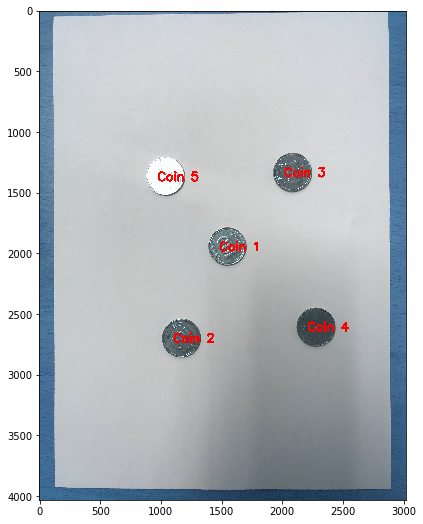

In [108]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img_orig)